In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'0': 1024}


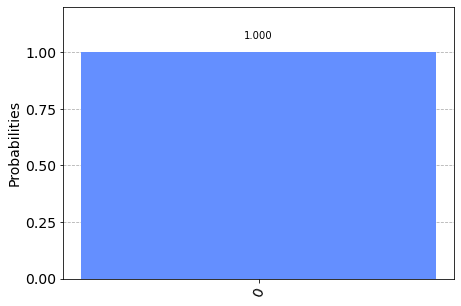

In [2]:
x = QuantumRegister(1)
y = QuantumRegister(1)
c = ClassicalRegister(1, "c")
qc = QuantumCircuit(x, y, c, name="deutsch1")

# H*X*H = Z 
# Z*y = -y
# x*Z*y = -xy
def oracle(qc, x, y):
    qc.x(y)

qc.x(y)
qc.h(y)
qc.h(x)

oracle(qc, x, y)

qc.h(x)

qc.measure(x, c[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

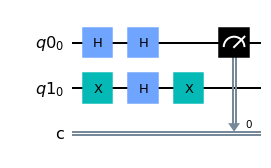

In [3]:
qc.draw(output='mpl')

{'1': 1024}


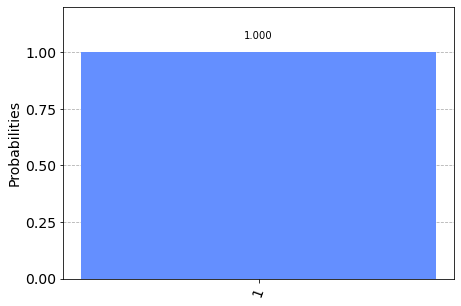

In [4]:
x = QuantumRegister(1)
y = QuantumRegister(1)
c = ClassicalRegister(1, "c")
qc = QuantumCircuit(x, y, c, name="deutsch1")

# H*CX*H = CZ 
# Fase kick back in X
# |x>CZ|1> = |0>CZ|1> + |1>CZ|1> = |0>|1> - |1>|1>
# |x>CZ|1> = (|0>-|1>)|1>
def oracle(qc, x, y):
    qc.cx(x,y)

qc.x(y)
qc.h(y)
qc.h(x)

oracle(qc, x, y)

qc.h(x)

qc.measure(x, c[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

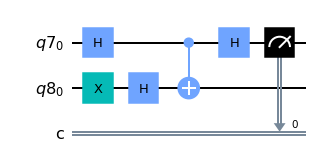

In [5]:
qc.draw(output='mpl')

In [4]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [6]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job = execute(qc, backend=backend, shots=shots)
job_monitor(job)

Job Status: job has successfully run


In [7]:
result = job.result()
print(result)

Result(backend_name='ibmqx2', backend_version='1.2.0', date=datetime.datetime(2019, 7, 2, 23, 31, 1, tzinfo=tzutc()), execution_id='6c3595c4-9d21-11e9-ac6e-9c5c8e96e1ef', header=Obj(backend_name='ibmqx2', backend_version='1.0.0'), job_id='unknown', qobj_id='5d1ec878-900e-4bde-8f48-f6648e70c6c8', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=495, 0x1=529)), header=Obj(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], memory_slots=1, n_qubits=5, name='truth_table1', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, shots=1024, success=True)], status='Successful completion', success=True)


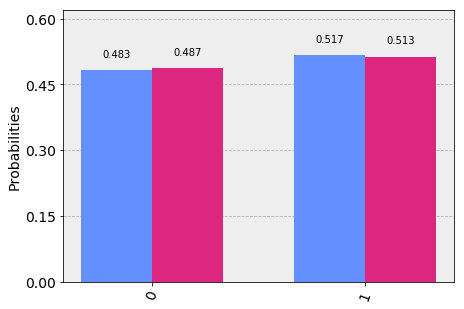

In [8]:
counts_exp = result.get_counts(qc)
plot_histogram([counts_exp,counts])

In [9]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

JOB ID: 5d1be90c4837070074f43f00
